In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

with open('attention_vis_with_time.pickle', 'rb') as handle:
    atten_vis = pickle.load(handle)

In [3]:
atten_vis[0]

{'query_rel': [2],
 'query_time': [66],
 '1layer': {'attention_score': [[0.5000028014183044],
   [0.500002920627594],
   [0.5000028014183044],
   [0.5000014305114746],
   [0.5000032186508179],
   [0.5000028014183044],
   [0.5000028014183044],
   [0.5000012516975403],
   [0.5000028014183044],
   [0.5000028014183044],
   [0.5142939686775208],
   [0.5000028014183044],
   [0.5142939686775208],
   [0.5000028014183044],
   [0.5000028014183044],
   [0.5000028014183044],
   [0.5000015497207642],
   [0.5000026822090149],
   [0.5000022053718567],
   [0.5000014305114746],
   [0.510456383228302],
   [0.510456383228302],
   [0.5000015497207642],
   [0.5207041501998901],
   [0.510456383228302],
   [0.5000015497207642],
   [0.5000015497207642],
   [0.5207041501998901],
   [0.5000030994415283],
   [0.5046365857124329],
   [0.5000015497207642],
   [0.5000022053718567],
   [0.5000015497207642],
   [0.910963773727417]],
  'rel': [2,
   6,
   2,
   28,
   18,
   2,
   2,
   42,
   2,
   2,
   4,
   2,
   

In [2]:
all_timestamps = [atten_vis[i]['query_time'] for i in range(len(atten_vis))]
print(np.max(all_timestamps), np.min(all_timestamps))

361 18


In [3]:
atten_vis_1 = []
atten_vis_2 = []
atten_vis_3 = []
for i in range(len(atten_vis)):
    if atten_vis[i]['query_time'] < 182:
        atten_vis_1.append(atten_vis[i])
    elif atten_vis[i]['query_time'] >= 182:
            atten_vis_2.append(atten_vis[i])
    # elif atten_vis[i]['query_rel_time'] >= 330 and atten_vis[i]['query_rel_time'] < 347:
    #     atten_vis_2.append(atten_vis[i])
    # elif atten_vis[i]['query_rel_time'] >= 347:
    #     atten_vis_3.append(atten_vis[i])
# atten_vis = atten_vis_1

In [4]:
def get_rel_score(atten_vis):
    query_set = set()
    target_set = set()
    select_query = []
    for idx in tqdm(range(len(atten_vis))):
        query_rel = atten_vis[idx]['query_rel']
        if query_rel in query_set:
            continue
        selected_index = (np.array(atten_vis[idx]['3layer']['attention_score']).reshape(-1) > 0.5)
        if np.sum(selected_index) <= 10:
            continue
        selected_rels= np.array(atten_vis[idx]['3layer']['rel'])[selected_index]
        # plt.plot(np.array(atten_vis[idx]['3layer']['attention_score']).reshape(-1))
        query_set.add(query_rel)
        target_set.update(selected_rels)
        select_query.append(idx)
    return query_set, target_set, select_query
query_rel_1, target_rel_2, select_query_3 = get_rel_score(atten_vis_1)
query_rel_2, target_rel_2, select_query_3 = get_rel_score(atten_vis_2)
# query_rel_3, target_rel_3, select_query_3 = get_rel_score(atten_vis_3)

 12%|█▎        | 6/48 [00:00<00:00, 58.78it/s]

100%|██████████| 53/53 [00:00<00:00, 94.29it/s] 


In [38]:
# set intersection
shared_rel = query_rel_1.intersection(query_rel_2)
def get_common_rel(atten_vis, shared_rel):
    visited_rel = set()
    target_set = set()
    select_query = []
    for idx in tqdm(range(len(atten_vis))):
        query_rel = atten_vis[idx]['query_rel']
        if not (query_rel in shared_rel and query_rel not in visited_rel):
            continue
        # print('ok')
        visited_rel.add(query_rel)
        selected_index = (np.array(atten_vis[idx]['4layer']['attention_score']).reshape(-1) > 0.1)
        if np.sum(selected_index) <= 3:
            continue
        selected_rels= np.array(atten_vis[idx]['4layer']['rel'])[selected_index]
        print(id2relation[query_rel], id2time[atten_vis[idx]['query_time']])
        # plt.plot(np.array(atten_vis[idx]['3layer']['attention_score']).reshape(-1))
        target_set.update(selected_rels)
        select_query.append(idx)
    return target_set, select_query

target_set_rel1, select_query1 = get_common_rel(atten_vis_1, shared_rel)
target_set_rel2, select_query2 = get_common_rel(atten_vis_2, shared_rel)
# print(len(target))

 54%|█████▍    | 26/48 [00:00<00:00, 141.59it/s]

make statement 2014-03-06
express intent to meet or negotiate 2014-06-16
consult 2014-04-24
host a visit 2014-06-04
use conventional military force 2014-04-18
make an appeal or request 2014-01-20
reject 2014-02-01


100%|██████████| 48/48 [00:00<00:00, 125.39it/s]


investigate 2014-02-15
praise or endorse 2014-04-26
arrest, detain, or charge with legal action 2014-06-22
sign formal agreement 2014-05-02


  0%|          | 0/53 [00:00<?, ?it/s]

express intent to meet or negotiate 2014-11-04
make statement 2014-09-29
praise or endorse 2014-07-25


 34%|███▍      | 18/53 [00:00<00:00, 80.68it/s]

make an appeal or request 2014-11-15
consult 2014-09-09
investigate 2014-07-22
use conventional military force 2014-07-29
host a visit 2014-09-03
reject 2014-10-01


100%|██████████| 53/53 [00:00<00:00, 140.17it/s]

sign formal agreement 2014-12-23
arrest, detain, or charge with legal action 2014-08-10


In [20]:
len(shared_rel)

11

In [17]:
target_rel_set = target_set_rel1.intersection(target_set_rel2)

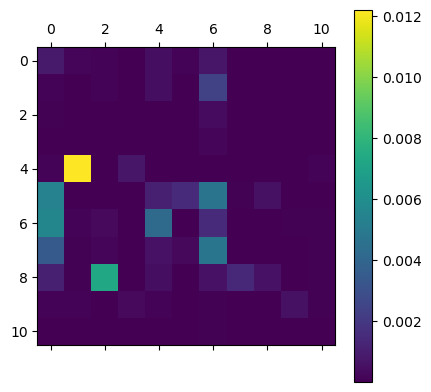

In [23]:
import random
select_query_rel = list(shared_rel)
# random_select = random.sample(list(target_set), 47)
random_select = list(target_rel_set)[20:31]
target_max_rel = np.max(random_select)
target_rel_to_idx = np.zeros(target_max_rel + 1, dtype=np.int32)
target_rel_to_idx[random_select] = np.arange(11)

def first_in_array(source, target):
    visitied = set()
    selected_index = []
    exist_target_rel = []
    for idx, item in enumerate(source):
        if item in target and item not in visitied:
            visitied.add(item)
            selected_index.append(idx)
            exist_target_rel.append(item)
    return selected_index, exist_target_rel

vis_mat = []

for idx in select_query1:
    # get the target rel
    masks, exist_target_rel = first_in_array(atten_vis_1[idx]['4layer']['rel'], random_select)
    # print(masks)
    # print(len(exist_target_rel))
    masks_value = np.array(atten_vis_1[idx]['4layer']['attention_score']).reshape(-1)[masks]
    # print(masks_value.shape)
    row_value = np.zeros(11)
    # print(target_rel_to_idx[exist_target_rel].shape)
    row_value[target_rel_to_idx[exist_target_rel]] = masks_value
    vis_mat.append(row_value)
plt.matshow(np.array(vis_mat))
plt.colorbar()

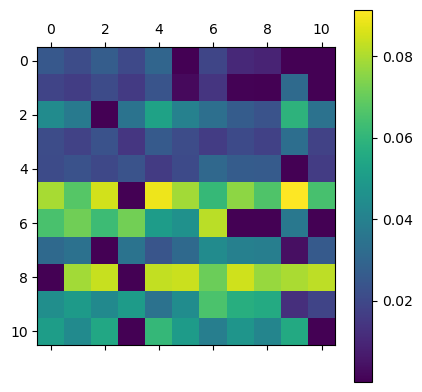

In [42]:
import random
select_query_rel = list(shared_rel)
# random_select = random.sample(list(target_set), 47)
random_select = list(target_rel_set)[20:31]
target_max_rel = np.max(random_select)
target_rel_to_idx = np.zeros(target_max_rel + 1, dtype=np.int32)
target_rel_to_idx[random_select] = np.arange(11)

def first_in_array(source, target):
    visitied = set()
    selected_index = []
    exist_target_rel = []
    for idx, item in enumerate(source):
        if item in target and item not in visitied:
            visitied.add(item)
            selected_index.append(idx)
            exist_target_rel.append(item)
    return selected_index, exist_target_rel

vis_mat2 = []

for idx in select_query2:
    # get the target rel
    masks, exist_target_rel = first_in_array(atten_vis_2[idx]['3layer']['rel'], random_select)
    # print(masks)
    # print(len(exist_target_rel))
    masks_value = np.array(atten_vis_2[idx]['3layer']['attention_score']).reshape(-1)[masks]
    # print(masks_value.shape)
    row_value = np.zeros(11)
    # print(target_rel_to_idx[exist_target_rel].shape)
    row_value[target_rel_to_idx[exist_target_rel]] = masks_value
    vis_mat2.append(row_value)
plt.matshow(np.array(vis_mat2))
plt.colorbar()

In [24]:
len(select_query1)

11

In [36]:
with open('id2relation.pickle', 'rb') as handle:
    id2relation = pickle.load(handle)
with open('id2time.pickle', 'rb') as handle:
    id2time = pickle.load(handle)

In [55]:
with open('data/icews14_aug/train.txt') as f:
    train_data = f.readlines()
dataset = [train_data.split('\t') for train_data in train_data]
data_dict = {}
for dd in dataset:
    if dd[1] not in data_dict.keys():
        data_dict[dd[1]] = [dd[-1]]
    data_dict[dd[1]].append(dd[-1])

{'criticize or denounce': ['2014-05-13\n',
  '2014-05-13\n',
  '2014-02-10\n',
  '2014-04-23\n',
  '2014-07-24\n',
  '2014-11-03\n',
  '2014-02-22\n',
  '2014-02-25\n',
  '2014-09-14\n',
  '2014-02-15\n',
  '2014-08-30\n',
  '2014-12-19\n',
  '2014-06-30\n',
  '2014-03-21\n',
  '2014-03-14\n',
  '2014-09-17\n',
  '2014-07-05\n',
  '2014-01-06\n',
  '2014-06-05\n',
  '2014-06-27\n',
  '2014-01-22\n',
  '2014-02-28\n',
  '2014-11-26\n',
  '2014-05-22\n',
  '2014-04-15\n',
  '2014-12-01\n',
  '2014-04-24\n',
  '2014-08-26\n',
  '2014-11-03\n',
  '2014-01-11\n',
  '2014-07-03\n',
  '2014-10-22\n',
  '2014-12-03\n',
  '2014-04-24\n',
  '2014-03-23\n',
  '2014-11-11\n',
  '2014-11-12\n',
  '2014-08-03\n',
  '2014-01-13\n',
  '2014-10-08\n',
  '2014-01-08\n',
  '2014-03-31\n',
  '2014-09-25\n',
  '2014-10-13\n',
  '2014-01-24\n',
  '2014-04-22\n',
  '2014-11-22\n',
  '2014-09-27\n',
  '2014-10-07\n',
  '2014-08-09\n',
  '2014-08-14\n',
  '2014-07-14\n',
  '2014-02-10\n',
  '2014-06-13\n',
  '

In [59]:
rel_str = []
for rel_id in list(target_rel_set)[20:31]: 
    print(rel_id, id2relation[rel_id])
    rel_str.append(id2relation[rel_id])
for rel_name in rel_str:
    # randomly select two from a list without replacement
    # print(rel_name)
    # print(data_dict[rel_name])
    random_select = np.sort(random.sample(data_dict[rel_name], 2))
    print(f"{rel_name} ({random_select[0][:-1]}, {random_select[1][:-1]})")

42 reject
44 fight with small arms and light weapons
173 ~appeal for change in leadership
45 ~fight with small arms and light weapons
46 make optimistic comment
54 make pessimistic comment
58 engage in symbolic act
59 ~engage in symbolic act
60 appeal for diplomatic cooperation (such as policy support)
62 return, release person(s)
66 provide humanitarian aid
reject (2014-05-30, 2014-06-23)
fight with small arms and light weapons (2014-04-17, 2014-08-05)
~appeal for change in leadership (2014-02-17, 2014-05-12)
~fight with small arms and light weapons (2014-05-08, 2014-10-13)
make optimistic comment (2014-05-22, 2014-07-29)
make pessimistic comment (2014-01-06, 2014-12-24)
engage in symbolic act (2014-02-14, 2014-10-29)
~engage in symbolic act (2014-02-17, 2014-03-17)
appeal for diplomatic cooperation (such as policy support) (2014-08-02, 2014-11-04)
return, release person(s) (2014-02-14, 2014-11-19)
provide humanitarian aid (2014-03-26, 2014-09-15)


In [39]:
for rel_id in select_query_rel: 
    if rel_id == 982:
        print('idd')
    else:
        print(id2relation[rel_id])

make statement
consult
sign formal agreement
investigate
make an appeal or request
express intent to meet or negotiate
host a visit
reject
arrest, detain, or charge with legal action
praise or endorse
use conventional military force


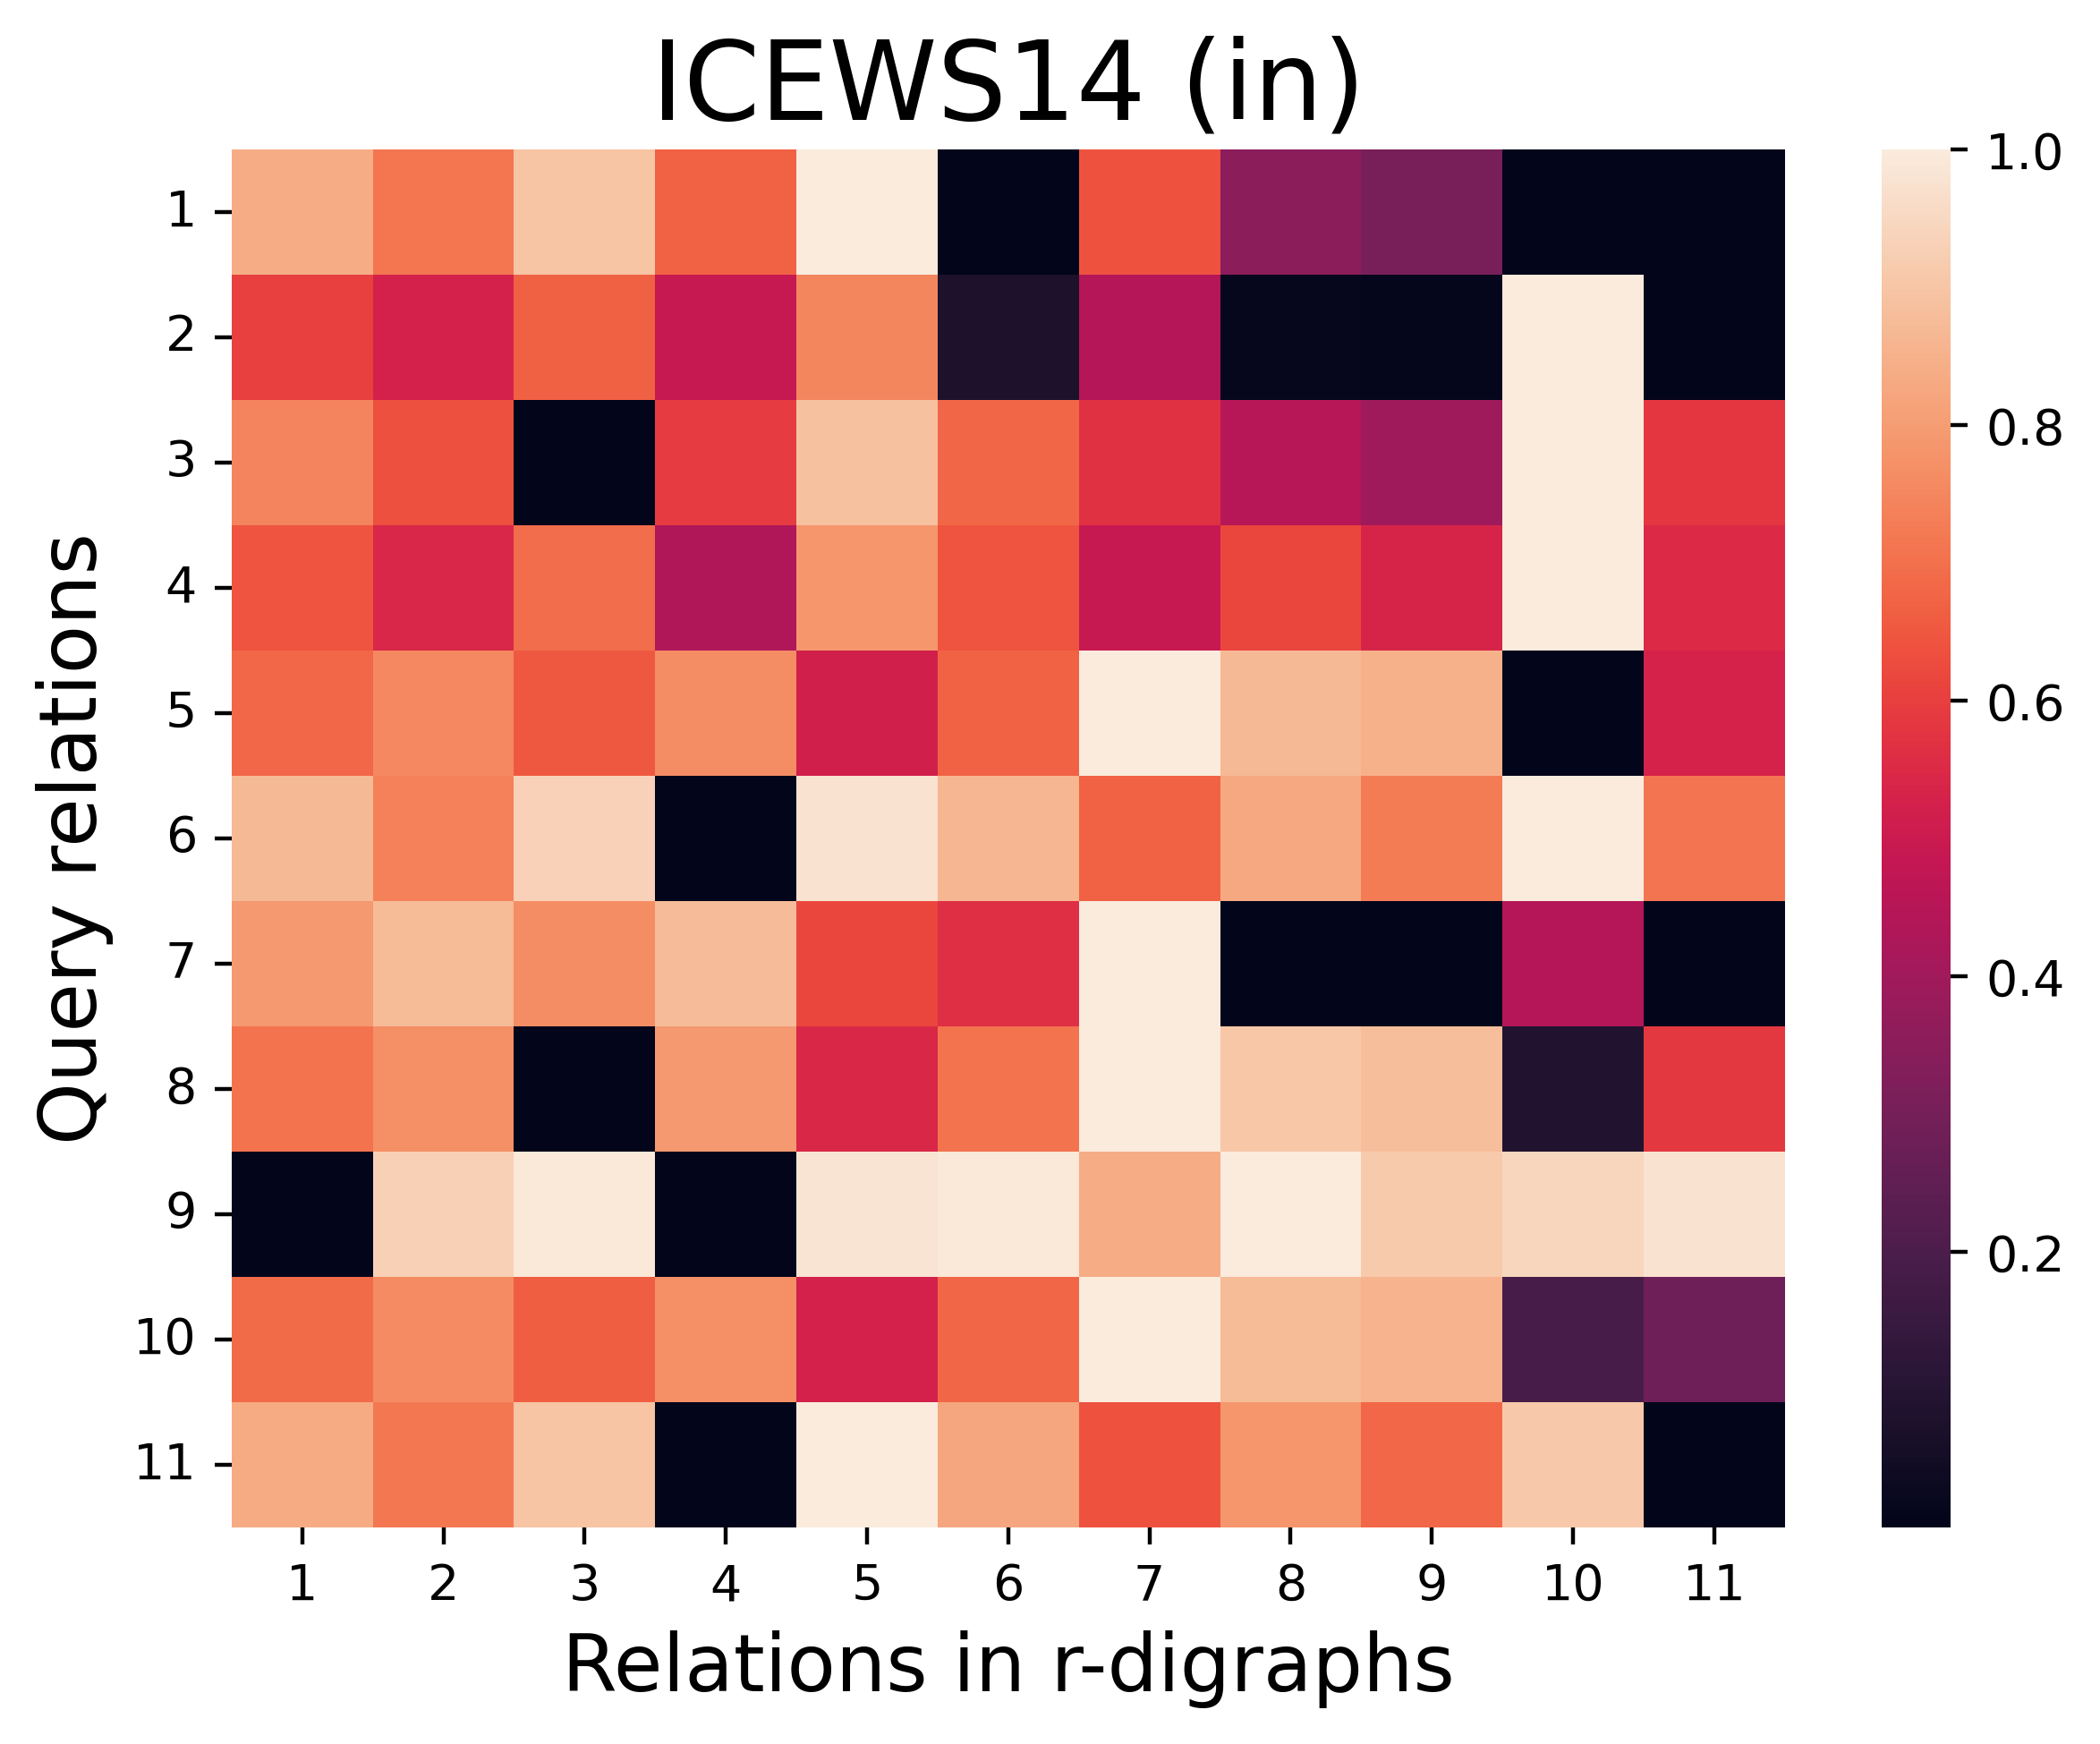

In [43]:
from matplotlib.font_manager import FontProperties
import seaborn as sns

font = FontProperties('sans')
font.set_size(10)
font_axis = {'family' : 'sans',
'weight' : 'light',
'size'  : 16,
}

font_axis2 = {'family' : 'Times New Roman',
'weight' : 'light',
'size'  : 22,
}

fig =plt.figure(dpi=400, figsize=(7,5))
vis_mat_array = np.array(vis_mat2)
sns.heatmap(vis_mat_array/np.max(vis_mat_array, axis=1, keepdims=True))

x_pos = np.arange(0, 11, 1) + 0.5
y_pos = np.arange(0, 11, 1) + 0.5

labels = np.arange(1, 12, 1) + 0

plt.xticks(x_pos, labels, rotation=0, fontproperties=font)
plt.yticks(y_pos, labels, rotation=0, fontproperties=font)

plt.xlabel('Relations in r-digraphs',font_axis)
plt.ylabel('Query relations',font_axis)
plt.title('ICEWS14 (in)', font_axis2)
plt.savefig("ICEWS14 (in)t2.pdf", bbox_inches='tight', pad_inches=0.02)
plt.show()

In [82]:
np.array(vis_mat)[36, 9]

0.9075226783752441

In [83]:
print(id2relation[select_query_rel[36]])
print(id2relation[random_select[9]])

Reversed Sign formal agreement
Make statement


NameError: name 'id2relation' is not defined